In [169]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [45]:
pip install ucimlrepo

In [46]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
banknote_authentication = fetch_ucirepo(id=267)

# data (as pandas dataframes)
X = banknote_authentication.data.features
y = banknote_authentication.data.targets

# metadata
print(banknote_authentication.metadata)

# variable information
print(banknote_authentication.variables)


{'uci_id': 267, 'name': 'Banknote Authentication', 'repository_url': 'https://archive.ics.uci.edu/dataset/267/banknote+authentication', 'data_url': 'https://archive.ics.uci.edu/static/public/267/data.csv', 'abstract': 'Data were extracted from images that were taken for the evaluation of an authentication procedure for banknotes.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1372, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Fri Feb 16 2024', 'dataset_doi': '10.24432/C55P57', 'creators': ['Volker Lohweg'], 'intro_paper': None, 'additional_info': {'summary': 'Data were extracted from images that were taken from genuine and forged banknote-like specimens.  For digitization, an industrial camera usually used for print inspection was used. The final im

In [195]:
X

,variance,skewness,curtosis,entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587
...,...,...,...,...
1367,-0.009711,-0.097693,-0.660962,0.300996
1368,-0.641313,-1.158984,1.179023,0.730127
1369,-1.472357,-2.621646,3.759017,-0.754884
1370,-1.406693,-1.756471,2.552043,-0.043158


In [196]:
y

,class
0,0
1,0
2,0
3,0
4,0
...,...
1367,1
1368,1
1369,1
1370,1


In [197]:
print(X.shape)
print(y.shape)

(1372, 4)
(1372, 1)


In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(1097, 4)
(275, 4)


In [199]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [200]:
X_train

array([[-0.6391558 ,  1.80557961, -0.18836535, -3.05096841],
       [ 0.82188925,  0.85239902, -0.59407847,  0.60345479],
       [-1.65703344, -1.63328321,  2.38386151, -0.34235536],
       ...,
       [-2.62138845,  1.26364283, -0.3095615 , -1.608634  ],
       [-1.36636167,  0.14870015, -0.31055139,  0.07724503],
       [-1.33045764, -1.52810408,  2.29230217,  0.29354966]])

In [291]:
class NeuralNetwork():
    def __init__(self):
        self.inputSize = 4
        self.hiddenSize1 = 8
        self.hiddenSize2 = 6
        self.hiddenSize3 = 4
        self.outputSize = 1

        # Weights
        self.W1 = np.random.randn(self.inputSize, self.hiddenSize1)
        self.W2 = np.random.randn(self.hiddenSize1, self.hiddenSize2)
        self.W3 = np.random.randn(self.hiddenSize2, self.hiddenSize3)
        self.W4 = np.random.randn(self.hiddenSize3, self.outputSize)

        # Biases
        self.b1 = np.zeros((1, self.hiddenSize1))
        self.b2 = np.zeros((1, self.hiddenSize2))
        self.b3 = np.zeros((1, self.hiddenSize3))
        self.b4 = np.zeros((1, self.outputSize))

        self.lr = 0.001

    def sigmoid(self, x, deriv=False):
        if deriv:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)

        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)

        self.z3 = np.dot(self.a2, self.W3) + self.b3
        self.a3 = self.sigmoid(self.z3)

        self.z4 = np.dot(self.a3, self.W4) + self.b4
        self.a4 = self.sigmoid(self.z4)

        return self.a4

    def backward(self, X, y, output):
        self.output_error = y - output
        self.output_delta = self.output_error * self.sigmoid(self.a4, deriv=True)

        self.z3_error = self.output_delta.dot(self.W4.T)
        self.z3_delta = self.z3_error * self.sigmoid(self.a3, deriv=True)

        self.z2_error = self.z3_delta.dot(self.W3.T)
        self.z2_delta = self.z2_error * self.sigmoid(self.a2, deriv=True)

        self.z1_error = self.z2_delta.dot(self.W2.T)
        self.z1_delta = self.z1_error * self.sigmoid(self.a1, deriv=True)

        self.W4 += self.lr * self.a3.T.dot(self.output_delta)
        self.W3 += self.lr * self.a2.T.dot(self.z3_delta)
        self.W2 += self.lr * self.a1.T.dot(self.z2_delta)
        self.W1 += self.lr * X.T.dot(self.z1_delta)

        self.b4 += self.lr * np.sum(self.output_delta.values, axis=0, keepdims=True)
        self.b3 += self.lr * np.sum(self.z3_delta.values, axis=0, keepdims=True)
        self.b2 += self.lr * np.sum(self.z2_delta.values, axis=0, keepdims=True)
        self.b1 += self.lr * np.sum(self.z1_delta.values, axis=0, keepdims=True)

    def train(self, X, y):
        output = self.feedForward(X)
        self.backward(X, y, output)

    def evaluate(self, X, y_true):
        y_pred_probs = self.feedForward(X)
        y_pred_classes = (y_pred_probs > 0.5).astype(int)

        y_true = np.array(y_true)
        mse = np.mean(np.square(y_true - y_pred_probs))
        acc = accuracy_score(y_true.flatten(), y_pred_classes.flatten())

        return mse, acc


In [292]:
NN = NeuralNetwork()

for i in range(1000):
    NN.train(X_train, y_train)
    if i % 100 == 0:
        loss, acc = NN.evaluate(X_train, y_train)
        print(f"Epoch {i}: Loss={loss:.4f}, Accuracy={acc:.4f}")


Epoch 0: Loss=0.2565, Accuracy=0.5597
Epoch 100: Loss=0.2065, Accuracy=0.7174
Epoch 200: Loss=0.0805, Accuracy=0.9690
Epoch 300: Loss=0.0323, Accuracy=0.9809
Epoch 400: Loss=0.0199, Accuracy=0.9809
Epoch 500: Loss=0.0148, Accuracy=0.9845
Epoch 600: Loss=0.0120, Accuracy=0.9900
Epoch 700: Loss=0.0102, Accuracy=0.9945
Epoch 800: Loss=0.0089, Accuracy=0.9945
Epoch 900: Loss=0.0079, Accuracy=0.9945


In [293]:
loss_test, acc_test = NN.evaluate(X_test, y_test)
print(f"Test Loss: {loss_test:.4f}, Accuracy: {acc_test:.4f}")


Test Loss: 0.0109, Accuracy: 0.9818


In [294]:
losses = []
accuracies = []

for i in range(1000):
    NN.train(X_train, y_train)
    if i % 10 == 0:
        loss, acc = NN.evaluate(X_train, y_train)
        losses.append(loss)
        accuracies.append(acc)


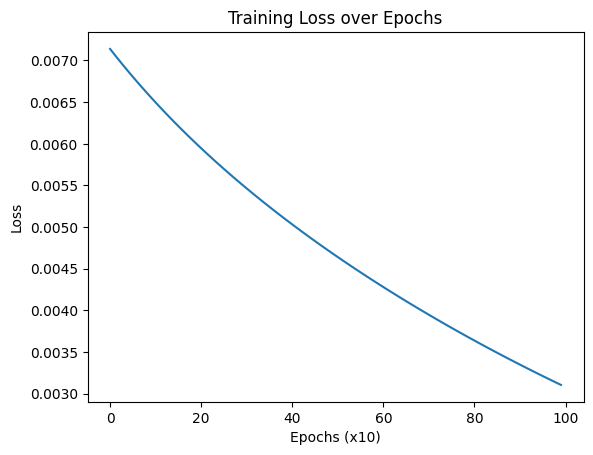

In [295]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.title("Training Loss over Epochs")
plt.xlabel("Epochs (x10)")
plt.ylabel("Loss")
plt.show()
